In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style="whitegrid")

df = pd.read_csv("INMET_NE_BA_A401_SALVADOR_01-01-2024_A_31-12-2024.CSV", skiprows=8,
                encoding='latin1',
                sep= ';'  )


display(df.columns)
#display(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])

Index(['Data', 'Hora UTC', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)'],
      dtype='object')

In [3]:
df.rename(columns = {
    'Data': 'Data',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)' : 'Precipitacao',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Umidade'
}, inplace=True)

#Colocando a data da maneira correta:
df['Data'] = pd.to_datetime(df['Data'], errors='coerce', dayfirst=True)

#Tranfornando possiveis valores não numericos em numericos:
df['Precipitacao'] = pd.to_numeric(df['Precipitacao'], errors='coerce')
df['Umidade'] = pd.to_numeric(df['Umidade'], errors='coerce')

#Tranformando a data em mes para uma meçhor analise
df['Ano-Mes'] = df['Data'].dt.to_period('M')

#Criando uma coluna para saber se choveu
df['Choveu'] = np.where(df['Precipitacao'] > 0, 1, 0)

df.head(30)




,Data,Hora UTC,Precipitacao,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),Umidade,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Ano-Mes,Choveu
0,2024-01-01,0000 UTC,0.0,"1006,7","1006,7","1005,8",NaN,"26,8","22,8","26,8",...,"22,8","22,6",79.0,78.0,79.0,66.0,"5,3","1,4",2024-01,0
1,2024-01-01,0100 UTC,0.0,"1006,9","1006,9","1006,7",NaN,"26,7","22,6","26,8",...,"22,8","22,4",79.0,77.0,78.0,62.0,"5,5","1,2",2024-01,0
2,2024-01-01,0200 UTC,0.0,"1006,9","1007,1","1006,8",NaN,"26,5","22,9","26,7",...,23,"22,5",81.0,78.0,81.0,75.0,"4,6","1,2",2024-01,0
3,2024-01-01,0300 UTC,0.0,"1006,5","1006,9","1006,5",NaN,"26,3","22,7","26,5",...,"22,9","22,6",82.0,80.0,81.0,69.0,"4,6","1,1",2024-01,0
4,2024-01-01,0400 UTC,0.0,"1006,5","1006,6","1006,5",NaN,26,"22,6","26,3",...,"22,7","22,5",82.0,81.0,81.0,56.0,"4,2","0,8",2024-01,0
5,2024-01-01,0500 UTC,0.0,"1006,4","1006,6","1006,3",NaN,"25,6","22,7","26,1",...,"22,8","22,5",84.0,81.0,84.0,28.0,"3,4","0,6",2024-01,0
6,2024-01-01,0600 UTC,0.0,"1006,3","1006,5","1006,3",NaN,"25,1","22,7","25,7",...,"22,7","22,5",87.0,83.0,87.0,35.0,"2,5","0,6",2024-01,0
7,2024-01-01,0700 UTC,0.0,"1006,3","1006,3","1006,1",NaN,"24,9","22,7","25,3",...,"22,9","22,6",88.0,86.0,87.0,347.0,"2,1","0,3",2024-01,0
8,2024-01-01,0800 UTC,0.0,"1006,7","1006,7","1006,3",NaN,"24,7","22,7",25,...,"22,9","22,6",89.0,87.0,89.0,328.0,"2,8","0,4",2024-01,0
9,2024-01-01,0900 UTC,0.0,"1007,1","1007,2","1006,7","51,2","25,2","23,1","25,2",...,"23,1","22,7",90.0,88.0,88.0,32.0,2,"0,7",2024-01,0


**Dados grafico 1**

In [4]:
dados_mensais = df.groupby('Ano-Mes').agg({
    'Precipitacao' : 'sum',
    'Umidade' : 'sum',
    'Choveu' : 'sum'
}).reset_index()

dados_mensais.rename(columns= {
    'Precipitacao': 'Total de precipitação (mm)',
    'Choveu': 'Dias com chuva',
    'Umidade' : 'Umidade média (%)'
}, inplace= True)

dados_mensais

,Ano-Mes,Total de precipitação (mm),Umidade média (%),Dias com chuva
0,2024-01,58.0,56275.0,8
1,2024-02,61.0,57185.0,8
2,2024-03,32.0,58641.0,9
3,2024-04,149.0,63209.0,21
4,2024-05,42.0,60900.0,16
5,2024-06,18.0,58402.0,13
6,2024-07,20.0,57379.0,11
7,2024-08,30.0,59578.0,18
8,2024-09,1.0,54428.0,1
9,2024-10,6.0,56244.0,1


***Plotagem grafico 1***

<Figure size 1400x700 with 0 Axes>

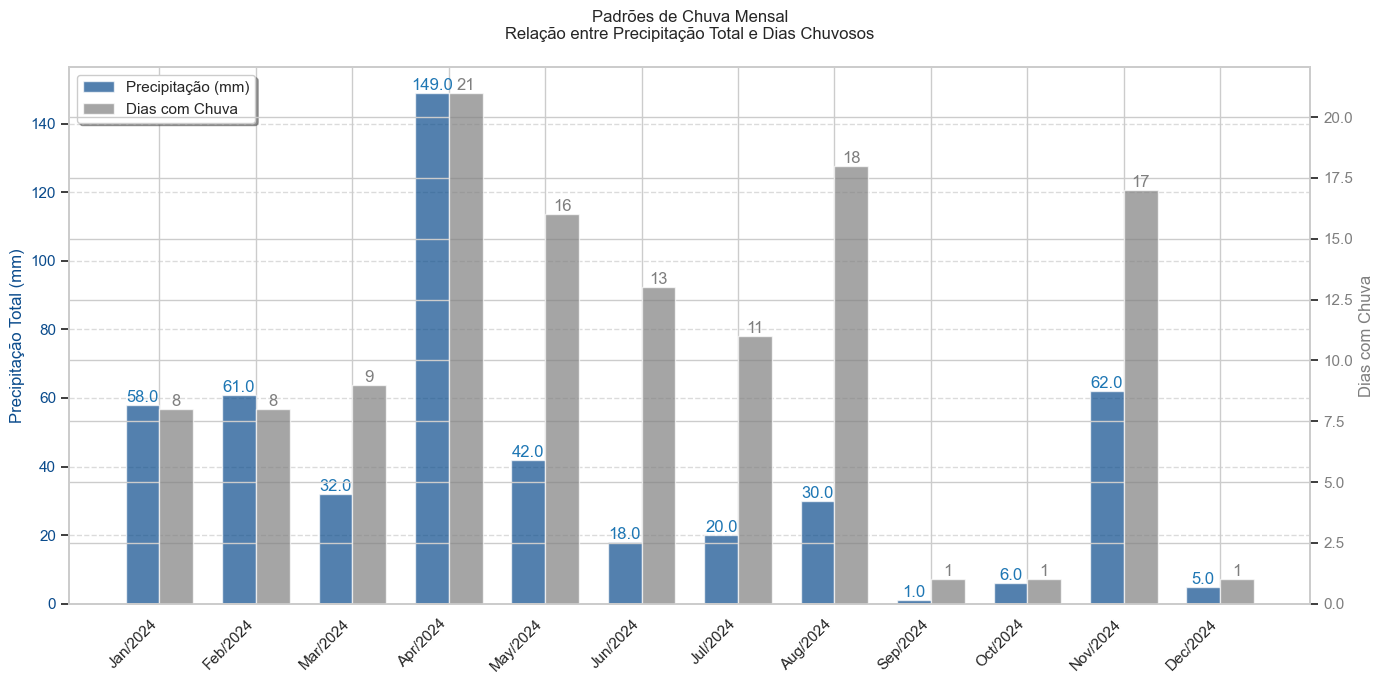

In [5]:

# Configurações do gráfico
plt.figure(figsize=(14, 7))
bar_width = 0.35

# Converter período para string mais legível
meses_legiveis = dados_mensais['Ano-Mes'].dt.strftime('%b/%Y')  # Formato "Mês/Ano"
x = np.arange(len(meses_legiveis))

# Criar figura e eixo primário
fig, ax1 = plt.subplots(figsize=(14, 7))

# Barras de precipitação (eixo esquerdo)
bars1 = ax1.bar(x - bar_width/2, dados_mensais['Total de precipitação (mm)'], 
                width=bar_width, color='#0a4b8c', alpha=0.7, label='Precipitação (mm)')
ax1.set_ylabel('Precipitação Total (mm)', color='#0a4b8c')
ax1.tick_params(axis='y', labelcolor='#0a4b8c')

# Criar eixo secundário para dias de chuva
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, dados_mensais['Dias com chuva'], 
                width=bar_width, color='#7f7f7f', alpha=0.7, label='Dias com Chuva')
ax2.set_ylabel('Dias com Chuva', color='#7f7f7f')
ax2.tick_params(axis='y', labelcolor='#7f7f7f')

# Configurações comuns
plt.title('Padrões de Chuva Mensal\nRelação entre Precipitação Total e Dias Chuvosos', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(meses_legiveis, rotation=45, ha='right')

# Adicionar linhas de referência e valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', color='#1f77b4')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', color='#7f7f7f')

# Adicionar linhas de tendência
ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

# Unificar legendas
lines = [bars1[0], bars2[0]]
ax1.legend(lines, [l.get_label() for l in lines], loc='upper left')

# Melhorar a legenda
lines = [bars1[0], bars2[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', framealpha=1)

# Remover a legenda existente (se houver)
if ax1.get_legend() is not None:
    ax1.get_legend().remove()

# Adicionar nova legenda personalizada
lines = [bars1[0], bars2[0]]
labels = ['Precipitação (mm)', 'Dias com Chuva']
ax1.legend(lines, labels, 
           loc='upper left',
           bbox_to_anchor=(0, 1),
           framealpha=1,
           shadow=True)

plt.show()

***Dados e Plotagem do grafico 2***

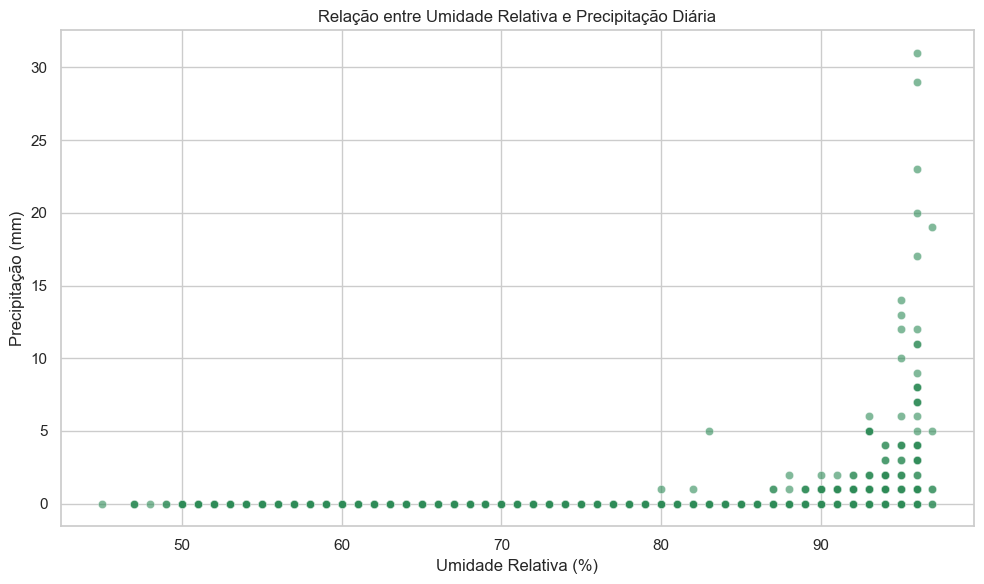

In [6]:
dados_dispersao = df.dropna(subset=['Precipitacao', 'Umidade'])

plt.figure(figsize=(10,6))

sns.scatterplot(
    x='Umidade', 
    y='Precipitacao', 
    data=dados_dispersao,
    color='seagreen',
    alpha=0.6
)

plt.xlabel('Umidade Relativa (%)')
plt.ylabel('Precipitação (mm)')
plt.title('Relação entre Umidade Relativa e Precipitação Diária')
plt.tight_layout()
plt.show()

***Analise de dados univariados***

In [8]:
from scipy import stats

# Selecionar a variável 
dados_precipitacao = df['Precipitacao'].dropna()

#Medidas de Tendência Central
media = dados_precipitacao.mean()
mediana = dados_precipitacao.median()
moda = dados_precipitacao.mode().values  

#Medidas de Dispersão
maximo = dados_precipitacao.max()
minimo = dados_precipitacao.min()
amplitude = maximo - minimo
variancia = dados_precipitacao.var()
desvio_padrao = dados_precipitacao.std()

#Medidas Separatrizes (Quartis)
quartis = dados_precipitacao.quantile([0.25, 0.5, 0.75])

#Exibir os resultados
print('___Resultados da analise sobre a Precipitacao:___')
print('\n___Medidas de Tendência Central:___')
print(f'Média: {media:.2f}')
print(f'Mediana: {mediana:.2f}')
print(f'Moda: {moda}')

print('\n___Medidas de Dispersão:___')
print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')
print(f'Amplitude: {amplitude}')
print(f'Variância: {variancia:.2f}')
print(f'Desvio Padrão: {desvio_padrao:.2f}')

print('\n___Medidas Separatrizes (Quartis):___')
print(f'1º Quartil (Q1): {quartis.loc[0.25]}')
print(f'2º Quartil (Q2: {quartis.loc[0.5]}')
print(f'3º Quartil (Q3): {quartis.loc[0.75]}')


___Resultados da analise sobre a Precipitacao:___

___Medidas de Tendência Central:___
Média: 0.06
Mediana: 0.00
Moda: [0.]

___Medidas de Dispersão:___
Máximo: 31.0
Mínimo: 0.0
Amplitude: 31.0
Variância: 0.68
Desvio Padrão: 0.82

___Medidas Separatrizes (Quartis):___
1º Quartil (Q1): 0.0
2º Quartil (Q2: 0.0
3º Quartil (Q3): 0.0


In [10]:

dados_mensais = df.groupby('Ano-Mes').agg({
    'Choveu': 'sum'
}).reset_index()

dados_mensais.rename(columns={'Choveu': 'Dias com Chuva'}, inplace=True)

# Selecionar a variável de interesse
dias_chuva = dados_mensais['Dias com Chuva'].dropna()

#Medidas de Tendência Central
media = dias_chuva.mean()
mediana = dias_chuva.median()
moda = dias_chuva.mode().values  # Pode ter mais de uma moda

#Medidas de Dispersão
maximo = dias_chuva.max()
minimo = dias_chuva.min()
amplitude = maximo - minimo
variancia = dias_chuva.var()
desvio_padrao = dias_chuva.std()

#Medidas Separatrizes (Quartis)
quartis = dias_chuva.quantile([0.25, 0.5, 0.75])

#Exibir os resultados
print('___Resultado da analise dias com chuva no mes:___')
print('\n___Medidas de Tendência Central:___')
print(f'Média: {media:.2f}')
print(f'Mediana: {mediana:.2f}')
print(f'Moda: {moda}')

print('\n___Medidas de Dispersão:___')
print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')
print(f'Amplitude: {amplitude}')
print(f'Variância: {variancia:.2f}')
print(f'Desvio Padrão: {desvio_padrao:.2f}')

print('\n___Medidas Separatrizes (Quartis):___')
print(f'1º Quartil (Q1): {quartis.loc[0.25]}')
print(f'2º Quartil (Q2): {quartis.loc[0.5]}')
print(f'3º Quartil (Q3): {quartis.loc[0.75]}')



___Resultado da analise dias com chuva no mes:___

___Medidas de Tendência Central:___
Média: 10.33
Mediana: 10.00
Moda: [1]

___Medidas de Dispersão:___
Máximo: 21
Mínimo: 1
Amplitude: 20
Variância: 48.24
Desvio Padrão: 6.95

___Medidas Separatrizes (Quartis):___
1º Quartil (Q1): 6.25
2º Quartil (Q2): 10.0
3º Quartil (Q3): 16.25


***Modelo de grafico com regressão linear:***
***Precipitação Diaria em função da Umidade Relativa***

Equação da reta: Precipitação = -0.75 + 0.01 * Umidade
Coeficiente de Determinação (R²): 0.02


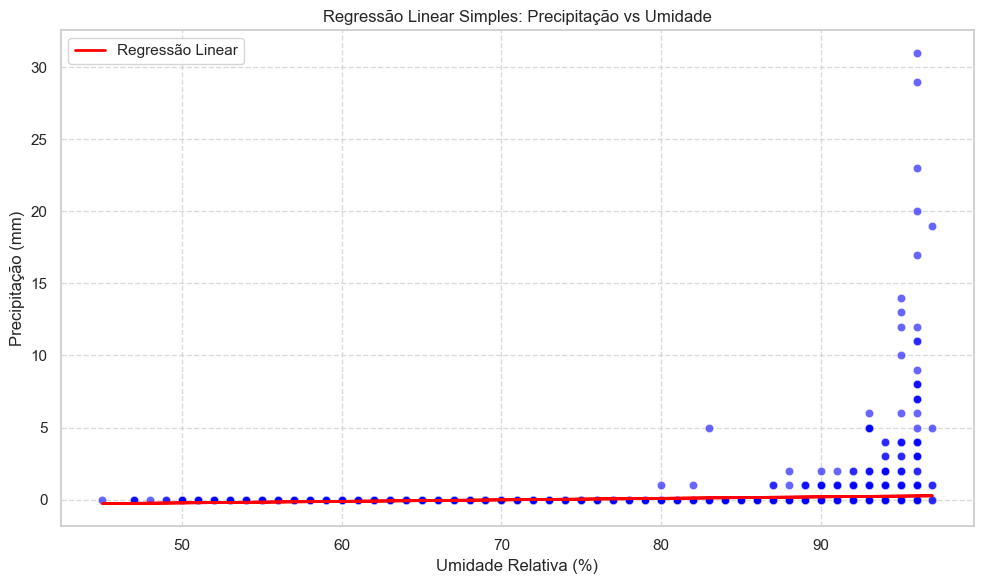

In [11]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filtrar dados válidos
dados_regressao = df.dropna(subset=['Precipitacao', 'Umidade'])

# Definir variáveis
X = dados_regressao[['Umidade']]  # Precisa estar em formato de DataFrame
y = dados_regressao['Precipitacao']

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Obter coeficientes
a = modelo.intercept_  # Intercepto
b = modelo.coef_[0]    # Inclinação

print(f'Equação da reta: Precipitação = {a:.2f} + {b:.2f} * Umidade')

# Fazer previsões
y_pred = modelo.predict(X)

# Avaliar o modelo
r2 = r2_score(y, y_pred)
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

# Plotar
plt.figure(figsize=(10,6))
sns.scatterplot(x='Umidade', y='Precipitacao', data=dados_regressao, color='blue', alpha=0.6)
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.title('Regressão Linear Simples: Precipitação vs Umidade')
plt.xlabel('Umidade Relativa (%)')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
